# LangChain: Q&A over Documents

An example might be a tool that would allow you to query a product catalog for items of interest.

In [1]:
#pip install --upgrade langchain

In [9]:
# Retrival over some document
from langchain.chains import RetrievalQA
# Document Loader - load proprietary data to load to LLM
from langchain.document_loaders import CSVLoader
# Vector Store # In memory store, no need extra vector db
from langchain.vectorstores import DocArrayInMemorySearch
from IPython.display import display, Markdown
from langchain_openai import ChatOpenAI

In [10]:
file = 'data/OutdoorClothingCatalog_1000.csv'
loader = CSVLoader(file_path=file)

In [11]:
from langchain.indexes import VectorstoreIndexCreator

In [12]:
#pip install docarray

In [13]:
from langchain_openai import OpenAIEmbeddings

index = VectorstoreIndexCreator(
    embedding=OpenAIEmbeddings(),
    vectorstore_cls=DocArrayInMemorySearch
).from_loaders([loader])

In [14]:
query ="Please list all your shirts with sun protection \
in a table in markdown and summarize each one."

In [18]:
llm = ChatOpenAI(temperature=0, model='gpt-4-turbo')
response = index.query(query, llm=llm)

In [21]:
display(Markdown(response))

Here's a table summarizing the shirts with sun protection:

| ID  | Name                                  | Fabric Composition                | Features                                                                                     |
|-----|---------------------------------------|-----------------------------------|----------------------------------------------------------------------------------------------|
| 618 | Men's Tropical Plaid Short-Sleeve Shirt | 100% Polyester                    | UPF 50+, wrinkle-resistant, front and back cape venting, two front bellows pockets           |
| 374 | Men's Plaid Tropic Shirt, Short-Sleeve | 52% Polyester, 48% Nylon          | UPF 50+, wrinkle-free, quickly evaporates perspiration, front and back cape venting, two front bellows pockets |
| 535 | Men's TropicVibe Shirt, Short-Sleeve   | 71% Nylon, 29% Polyester          | UPF 50+, wrinkle resistant, front and back cape venting, two front bellows pockets           |
| 255 | Sun Shield Shirt                       | 78% Nylon, 22% Lycra Xtra Life fiber | UPF 50+, moisture-wicking, quick-drying, abrasion resistant, fits over swimsuits             |

### Summary of Each Shirt:
1. **Men's Tropical Plaid Short-Sleeve Shirt (ID 618)**: This shirt offers the highest level of sun protection (UPF 50+), is made entirely of polyester, and features wrinkle resistance. It includes venting for cooling and practical pockets.
   
2. **Men's Plaid Tropic Shirt, Short-Sleeve (ID 374)**: Designed originally for fishing, this shirt combines polyester and nylon for durability and comfort. It also features UPF 50+ sun protection, is wrinkle-free, and has efficient moisture evaporation properties.

3. **Men's TropicVibe Shirt, Short-Sleeve (ID 535)**: This shirt is a blend of nylon and polyester, providing UPF 50+ protection. It is wrinkle-resistant and includes venting and pockets for functionality.

4. **Sun Shield Shirt (ID 255)**: Made with a blend of nylon and Lycra, this shirt not only offers UPF 50+ protection but also excels in moisture-wicking and quick-drying capabilities. It's designed to fit comfortably over swimsuits and is abrasion-resistant for durable wear.

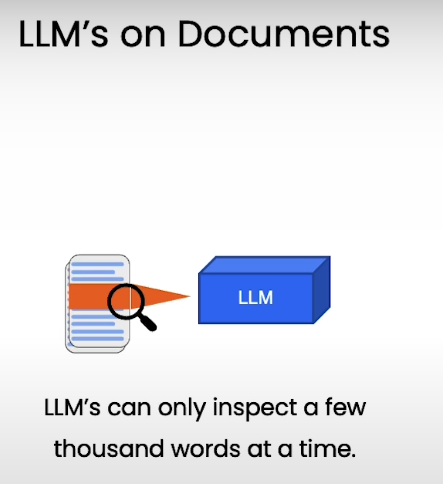

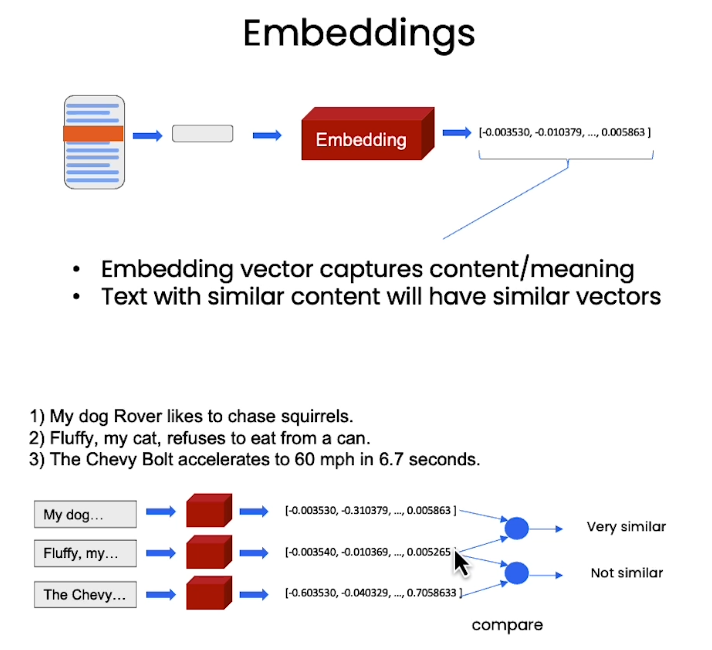

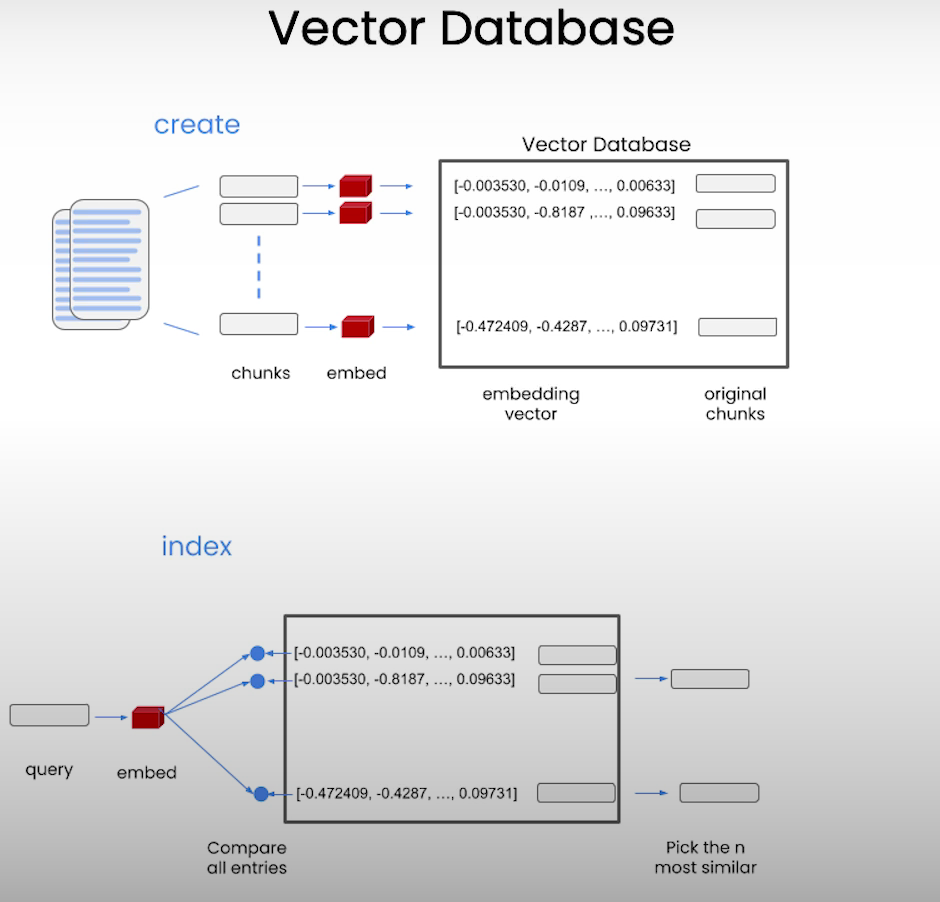

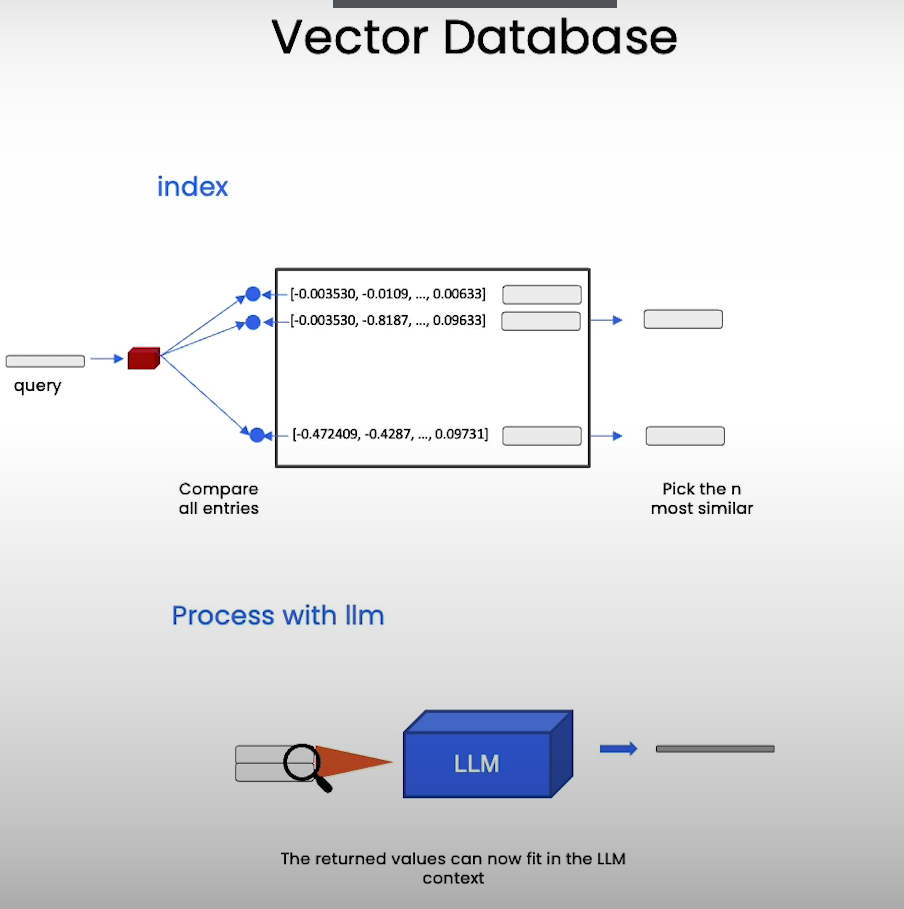





## Step By Step

In [22]:
from langchain.document_loaders import CSVLoader
loader = CSVLoader(file_path=file)

In [23]:
docs = loader.load()

In [24]:
docs[0]

Document(metadata={'source': 'data/OutdoorClothingCatalog_1000.csv', 'row': 0}, page_content=": 0\nname: Women's Campside Oxfords\ndescription: This ultracomfortable lace-to-toe Oxford boasts a super-soft canvas, thick cushioning, and quality construction for a broken-in feel from the first time you put them on. \n\nSize & Fit: Order regular shoe size. For half sizes not offered, order up to next whole size. \n\nSpecs: Approx. weight: 1 lb.1 oz. per pair. \n\nConstruction: Soft canvas material for a broken-in feel and look. Comfortable EVA innersole with Cleansport NXT® antimicrobial odor control. Vintage hunt, fish and camping motif on innersole. Moderate arch contour of innersole. EVA foam midsole for cushioning and support. Chain-tread-inspired molded rubber outsole with modified chain-tread pattern. Imported. \n\nQuestions? Please contact us for any inquiries.")

In [26]:
from langchain_openai import OpenAIEmbeddings
embeddings = OpenAIEmbeddings()

In [27]:
embed = embeddings.embed_query("Hi my name is Harrison")

In [28]:
print(len(embed))

1536


In [29]:
print(embed[:5])

[-0.0219351164996624, 0.006751196924597025, -0.0182583499699831, -0.03915192559361458, -0.013979244977235794]


In [30]:
db = DocArrayInMemorySearch.from_documents(
    docs, 
    embeddings
)

In [31]:
query = "Please suggest a shirt with sunblocking"

In [32]:
docs = db.similarity_search(query)

In [33]:
len(docs)

4

In [34]:
docs[0]

Document(metadata={'source': 'data/OutdoorClothingCatalog_1000.csv', 'row': 255}, page_content=': 255\nname: Sun Shield Shirt by\ndescription: "Block the sun, not the fun – our high-performance sun shirt is guaranteed to protect from harmful UV rays. \n\nSize & Fit: Slightly Fitted: Softly shapes the body. Falls at hip.\n\nFabric & Care: 78% nylon, 22% Lycra Xtra Life fiber. UPF 50+ rated – the highest rated sun protection possible. Handwash, line dry.\n\nAdditional Features: Wicks moisture for quick-drying comfort. Fits comfortably over your favorite swimsuit. Abrasion resistant for season after season of wear. Imported.\n\nSun Protection That Won\'t Wear Off\nOur high-performance fabric provides SPF 50+ sun protection, blocking 98% of the sun\'s harmful rays. This fabric is recommended by The Skin Cancer Foundation as an effective UV protectant.')

In [35]:
retriever = db.as_retriever()

In [40]:
llm = ChatOpenAI(temperature = 0.0, model="gpt-4-turbo")

In [41]:
qdocs = "".join([docs[i].page_content for i in range(len(docs))])

In [42]:
response = llm.invoke(f"{qdocs} Question: Please list all your \
shirts with sun protection in a table in markdown and summarize each one.")

In [45]:
display(Markdown(response.content))

Below is a markdown table summarizing the shirts with sun protection features:

| ID  | Name                                 | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
|-----|--------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 255 | Sun Shield Shirt                     | High-performance sun shirt with UPF 50+ rating, made from 78% nylon and 22% Lycra Xtra Life fiber. Features include moisture-wicking, quick-drying comfort, abrasion resistance, and a fit that comfortably covers swimsuits. Handwash recommended.                                                                                                                                                                                                                                               |
| 374 | Men's Plaid Tropic Shirt, Short-Sleeve | Ultracomfortable sun protection shirt rated UPF 50+, designed originally for fishing. Made from 52% polyester and 48% nylon, it features SunSmart technology, wrinkle-free fabric, front and back cape venting, and two front bellows pockets. Machine washable and dryable.                                                                                                                                                                                                                      |
| 535 | Men's TropicVibe Shirt, Short-Sleeve  | Men’s sun-protection shirt with UPF 50+, featuring a traditional fit and made from 71% nylon and 29% polyester with a 100% polyester knit mesh lining. It includes wrinkle resistance, front and back cape venting, and two front bellows pockets. Machine washable.                                                                                                                                                                                                                           |
| 618 | Men's Tropical Plaid Short-Sleeve Shirt | Light hot-weather shirt with UPF 50+ rating, made entirely of polyester. It offers a traditional fit, wrinkle resistance, front and back cape venting, and two front bellows pockets. Imported.                                                                                                                                                                                                                                                                                               |

Each shirt listed offers UPF 50+ sun protection, blocking 98% of the sun's harmful UV rays, and includes various features like moisture-wicking, quick-drying, and wrinkle resistance to enhance comfort and usability in hot weather conditions.

In [46]:
qa_stuff = RetrievalQA.from_chain_type(
    llm=llm, 
    chain_type="stuff", 
    retriever=retriever, 
    verbose=True
)

In [47]:
query =  "Please list all your shirts with sun protection in a table \
in markdown and summarize each one."

In [51]:
response = qa_stuff.invoke(query)



> Entering new RetrievalQA chain...

> Finished chain.


In [50]:
display(Markdown(response))

Here's a table summarizing the shirts with sun protection:

| ID  | Name                                  | Fabric Composition                | UPF Rating | Additional Features                                                                 |
|-----|---------------------------------------|-----------------------------------|-----------|-------------------------------------------------------------------------------------|
| 618 | Men's Tropical Plaid Short-Sleeve Shirt | 100% Polyester                    | UPF 50+   | Wrinkle-resistant, front and back cape venting, two front bellows pockets           |
| 374 | Men's Plaid Tropic Shirt, Short-Sleeve  | 52% Polyester, 48% Nylon          | UPF 50+   | Wrinkle-free, quickly evaporates perspiration, machine washable and dryable         |
| 535 | Men's TropicVibe Shirt, Short-Sleeve    | 71% Nylon, 29% Polyester          | UPF 50+   | Wrinkle resistant, front and back cape venting, two front bellows pockets           |
| 255 | Sun Shield Shirt                       | 78% Nylon, 22% Lycra Xtra Life fiber | UPF 50+   | Moisture-wicking, quick-drying, abrasion-resistant, fits over swimsuits             |

### Summary:
1. **Men's Tropical Plaid Short-Sleeve Shirt (ID 618)**: This shirt is made entirely of polyester, offering the highest sun protection (UPF 50+), and features like wrinkle resistance and venting for cooling.
2. **Men's Plaid Tropic Shirt, Short-Sleeve (ID 374)**: Designed originally for fishing, this shirt blends polyester and nylon, providing excellent sun protection (UPF 50+) and features that enhance comfort and usability, such as being wrinkle-free and quick-drying.
3. **Men's TropicVibe Shirt, Short-Sleeve (ID 535)**: Combining nylon and polyester, this shirt offers top-level sun protection (UPF 50+) and is designed to be wrinkle-resistant with venting for breathability.
4. **Sun Shield Shirt (ID 255)**: This shirt uses a blend of nylon and Lycra, focusing on sun protection (UPF 50+) and durability, with features like moisture-wicking and abrasion resistance, suitable for outdoor activities and water sports.

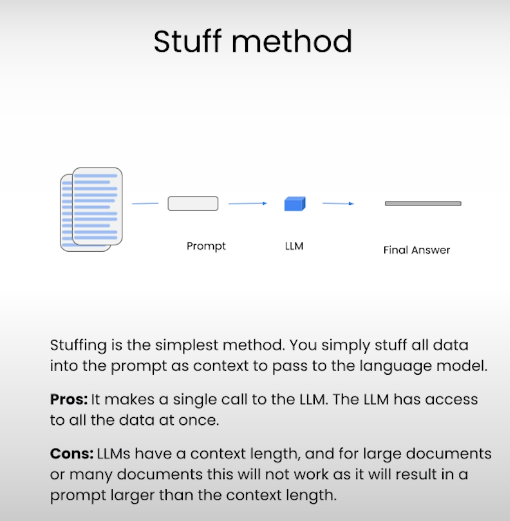

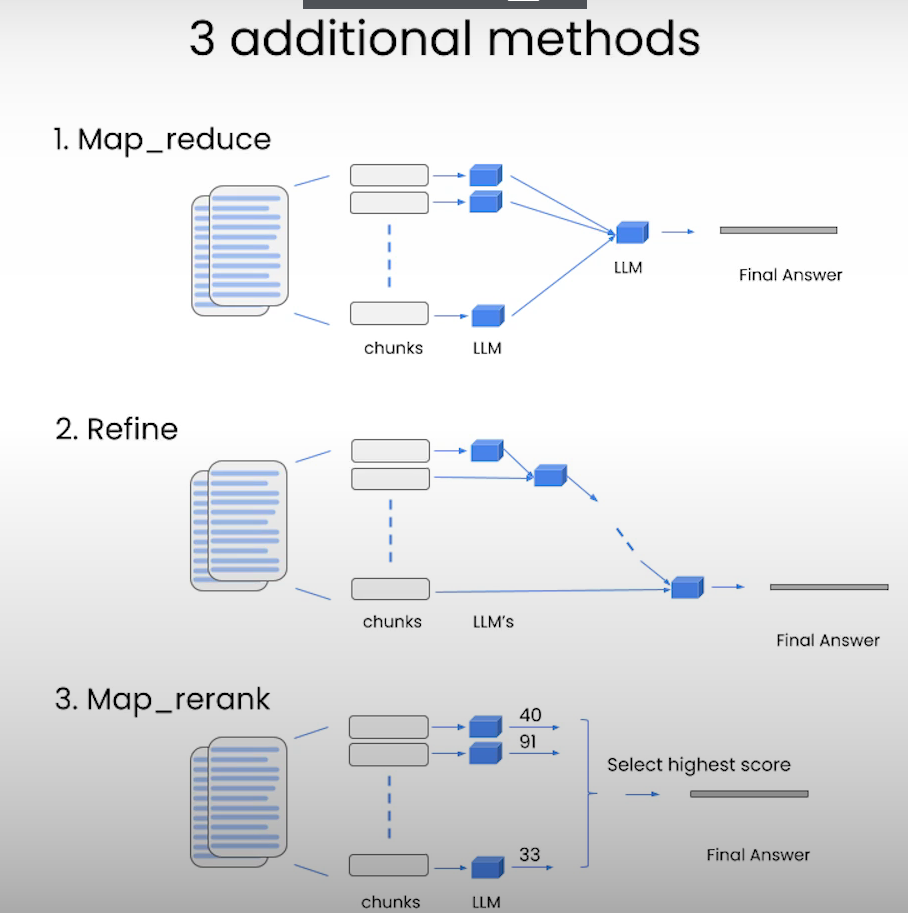

1. map_reduce
- take all the chunks pass them along with the question to a language model, gets back a response, and then uses another language model call to summarize all of the individual responses into final answer

- Pros: it can operate over any number of documents(independent question on parallel calls)
- Cons: take a lot more calls

2. refine
- loop over many document, but it actually does it iteratively. It builds upon the answer from the previous document, so this is really good for combining information and building up an answer over time. it will generally lead to longer answer. and it is also not as fast because now the call aren't independent

3. map_rerank
- "Map_rerank" is a pretty interesting and a bit more experimental one where you do a single call to the language model for each document. And you also ask it to return a score.

- And then you select the highest score. This relies on the language model to know what the score should be. So you often have to tell it, "Hey, it should be a high score if it's relevant to the document and really refine the instructions there". Similar to "Map_reduce", all the calls are independent. So you can batch them and it's relatively fast. But again, you're making a bunch of language model calls. So it will be a bit more expensive.

- "Map_rerank" is an experimental method where a single call is made to the language model for each document, and the model returns a score. The highest score is selected. This method relies on clear instructions to the language model about what constitutes a high score. Similar to "Map_reduce", the calls are independent and can be batched for efficiency, but it is more expensive due to the number of language model calls required.